# Changes in Gene Expression in Adipose Tissue with Ageing: Analysis Using Python

**Step 1**: Import data and remove rows with missing values. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math

dge = pd.read_csv('adipose_tissue_DGE_results_Trim.csv') # read in data

In [2]:
dge.shape # show dataset shape

(35783, 8)

In [3]:
dge # show dataset

,Unnamed: 0,Gene.name,Gene.Identifier,Gene.type,Gene.description,Log2FC,pval,adjPval
0,1,A1BG,ENSG00000121410,protein_coding,alpha-1-B glycoprotein [Source:HGNC Symbol;Acc...,0.052028,0.864413,0.965223
1,2,A1BG-AS1,ENSG00000268895,antisense,A1BG antisense RNA 1 [Source:HGNC Symbol;Acc:H...,0.029932,0.884864,0.970851
2,3,A1CF,ENSG00000148584,protein_coding,APOBEC1 complementation factor [Source:HGNC Sy...,-0.115257,0.724364,0.921044
3,4,A2M,ENSG00000175899,protein_coding,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:...,-0.177397,0.111999,0.477501
4,5,A2M-AS1,ENSG00000245105,antisense,A2M antisense RNA 1 [Source:HGNC Symbol;Acc:HG...,-0.052158,0.721207,0.920238
...,...,...,...,...,...,...,...,...
35778,35779,ZYG11A,ENSG00000203995,protein_coding,"zyg-11 family member A, cell cycle regulator [...",0.028000,0.922999,0.979841
35779,35780,ZYG11B,ENSG00000162378,protein_coding,"zyg-11 family member B, cell cycle regulator [...",0.004701,0.960462,0.990779
35780,35781,ZYX,ENSG00000159840,protein_coding,zyxin [Source:HGNC Symbol;Acc:HGNC:13200],0.194963,0.336221,0.717851
35781,35782,ZZEF1,ENSG00000074755,protein_coding,zinc finger ZZ-type and EF-hand domain contain...,-0.001625,0.981567,0.995471


In [4]:
dge.dropna(subset = ['Log2FC'], axis = 0, inplace=True) # drop missing values based on the Log2FC column
dge.shape

(28791, 8)

In [5]:
dge # show new dataset

,Unnamed: 0,Gene.name,Gene.Identifier,Gene.type,Gene.description,Log2FC,pval,adjPval
0,1,A1BG,ENSG00000121410,protein_coding,alpha-1-B glycoprotein [Source:HGNC Symbol;Acc...,0.052028,0.864413,0.965223
1,2,A1BG-AS1,ENSG00000268895,antisense,A1BG antisense RNA 1 [Source:HGNC Symbol;Acc:H...,0.029932,0.884864,0.970851
2,3,A1CF,ENSG00000148584,protein_coding,APOBEC1 complementation factor [Source:HGNC Sy...,-0.115257,0.724364,0.921044
3,4,A2M,ENSG00000175899,protein_coding,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:...,-0.177397,0.111999,0.477501
4,5,A2M-AS1,ENSG00000245105,antisense,A2M antisense RNA 1 [Source:HGNC Symbol;Acc:HG...,-0.052158,0.721207,0.920238
...,...,...,...,...,...,...,...,...
35777,35778,ZXDC,ENSG00000070476,protein_coding,ZXD family zinc finger C [Source:HGNC Symbol;A...,-0.033337,0.654682,0.893371
35778,35779,ZYG11A,ENSG00000203995,protein_coding,"zyg-11 family member A, cell cycle regulator [...",0.028000,0.922999,0.979841
35779,35780,ZYG11B,ENSG00000162378,protein_coding,"zyg-11 family member B, cell cycle regulator [...",0.004701,0.960462,0.990779
35780,35781,ZYX,ENSG00000159840,protein_coding,zyxin [Source:HGNC Symbol;Acc:HGNC:13200],0.194963,0.336221,0.717851


**Step 2**: Calculate and print the number of up and down regulated genes between young and old people based on fold change and adjusted p-values.

In [6]:
# create a column to classify if a gene is upregulated (Up), downregulated (Down) or neither (Not) based on the columns Log2FC and adjPval
# a gene is upregulated if Log2FC is greater than 0.5 and downregulated if Log2FC is less than -0.5; it is statistically significant if adjusted p-value < 0.05

dge['Result'] = np.where((((dge["Log2FC"]>=0.5) & (dge["adjPval"] < 0.05))),'Up',
                  np.where(((dge["Log2FC"]<=-0.5) & (dge["adjPval"] < 0.05)),'Down','Not'))

dge

,Unnamed: 0,Gene.name,Gene.Identifier,Gene.type,Gene.description,Log2FC,pval,adjPval,Result
0,1,A1BG,ENSG00000121410,protein_coding,alpha-1-B glycoprotein [Source:HGNC Symbol;Acc...,0.052028,0.864413,0.965223,Not
1,2,A1BG-AS1,ENSG00000268895,antisense,A1BG antisense RNA 1 [Source:HGNC Symbol;Acc:H...,0.029932,0.884864,0.970851,Not
2,3,A1CF,ENSG00000148584,protein_coding,APOBEC1 complementation factor [Source:HGNC Sy...,-0.115257,0.724364,0.921044,Not
3,4,A2M,ENSG00000175899,protein_coding,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:...,-0.177397,0.111999,0.477501,Not
4,5,A2M-AS1,ENSG00000245105,antisense,A2M antisense RNA 1 [Source:HGNC Symbol;Acc:HG...,-0.052158,0.721207,0.920238,Not
...,...,...,...,...,...,...,...,...,...
35777,35778,ZXDC,ENSG00000070476,protein_coding,ZXD family zinc finger C [Source:HGNC Symbol;A...,-0.033337,0.654682,0.893371,Not
35778,35779,ZYG11A,ENSG00000203995,protein_coding,"zyg-11 family member A, cell cycle regulator [...",0.028000,0.922999,0.979841,Not
35779,35780,ZYG11B,ENSG00000162378,protein_coding,"zyg-11 family member B, cell cycle regulator [...",0.004701,0.960462,0.990779,Not
35780,35781,ZYX,ENSG00000159840,protein_coding,zyxin [Source:HGNC Symbol;Acc:HGNC:13200],0.194963,0.336221,0.717851,Not


In [7]:
print("Number of upregulated genes in old compared with young:", len(dge[dge['Result'] == 'Up'])) # counts the rows that are classified as 'up' in results column
print("Number of downregulated genes in old compared with young:", len(dge[dge['Result'] == 'Down'])) # counts rows that are classified as 'down' in results column
print("Number of genes that are not differentially expressed between young and old:", len(dge[dge['Result'] == 'Not'])) # counts rows that are classified as 'Not' in results column

Number of upregulated genes in old compared with young: 321
Number of downregulated genes in old compared with young: 142
Number of genes that are not differentially expressed between young and old: 28328


**Step 3**: The most highly up- and down-regulated genes were identified and the values were printed.

In [8]:
# find and print the gene with the maximum fold change value
max_FC = round(dge["Log2FC"].max(),2) # gives max fold change and rounds to two dp
max_id = dge["Log2FC"].idxmax() # gives row id of max value
max_gene = dge["Gene.name"][max_id] # gives the gene name of the max value

print("Most upregulated gene in old compared with young:", max_gene)
print("Differential expression:", max_FC)

Most upregulated gene in old compared with young: LINC02141
Differential expression: 6.47


In [9]:
# find and print the gene with the minimum fold change value
min_FC = round(dge["Log2FC"].min(),2) # finds min fold change
min_id = dge["Log2FC"].idxmin() # gives row id of min value
min_gene = dge["Gene.name"][min_id] # gives the gene name of the min value

print("Most downregulated gene in old compared with young:", min_gene)
print("Differential expression:", min_FC)

Most downregulated gene in old compared with young: SBSN
Differential expression: -4.08


**Step 3**: Concatenate the top 10 DEGs with the highest and lowest fold changes into a single dataframe. Plot in a bar plot to show the gene names and their fold change.

In [10]:
dge_sig = dge[dge.adjPval <= 0.05] # create filter for genes with adj p<0.05

In [11]:
dge_order = dge_sig.sort_values('Log2FC') # sort fold change column by values

top_ten_up_down = pd.concat([dge_order.head(10),dge_order.tail(10)]).sort_index() # concatenate the top 10 and bottom 10 values into a new dataset

In [12]:
top_ten_up_down = top_ten_up_down.sort_values('Log2FC', ascending = False) # arrange values in descending order

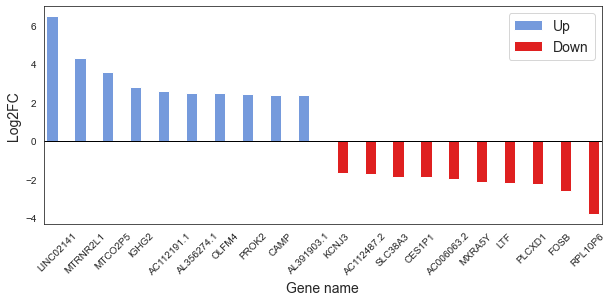

In [13]:
sns.set_style("white")
plt.figure(figsize = (10,4))

ax = sns.barplot(x = 'Gene.name', 
                 y = 'Log2FC',
                 data = top_ten_up_down, 
                 hue = 'Result',
                 palette=dict(Up='cornflowerblue', Down='red',)
                ) # create a bar plot with colours differentiated by up or down regulated

plt.xlabel("Gene name", fontsize = 14)
plt.ylabel("Log2FC", fontsize = 14)
plt.xticks(rotation=45) # change orientation of x labels
plt.axhline(0, color='k', linewidth = 1) # add a line for the x axis
plt.legend(loc='upper right', prop={'size': 14}) # place legend in top right hand corner


**Step 4:** Transform the data to create a volcano plot to show the differential gene expression.

In [14]:
dge["-log10Pval"] = np.log10(dge["adjPval"]) * -1 # create column in dataset for -log10(adjusted Pval)

In [15]:
dge["-log10Pval"] # check column

0        0.015372
1        0.012847
2        0.035720
3        0.321026
4        0.036100
           ...   
35777    0.048968
35778    0.008844
35779    0.004023
35780    0.143966
35781    0.001971
Name: -log10Pval, Length: 28791, dtype: float64

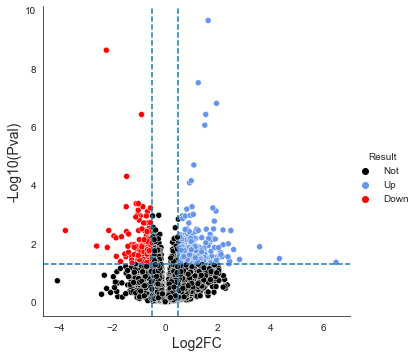

In [16]:
sns.set_style("white")

ax = sns.relplot(data=dge, 
                 x="Log2FC",
                 y="-log10Pval",
                 hue='Result',
                 palette=dict(Up='cornflowerblue', Down='red', Not='k'),
                 )


plt.xlabel("Log2FC", fontsize = 14)
plt.ylabel("-Log10(Pval)", fontsize = 14)
plt.axhline(-math.log(0.05,(10)), ls='--') # add in line to show where p-value = 0.05
plt.axvline(-0.5, ls='--') # add in line to show where Log2FC = -0.5
plt.axvline(0.5, ls='--') # add in line to show where Log2FC = 0.5
